In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
db = pd.read_csv('train.csv')
db_test = pd.read_csv('test.csv')

In [3]:
db_copy = db

In [4]:
db.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
db.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
db_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
qtd_nan_train = db.isna().sum()
qtd_nan_test = db_test.isna().sum()

In [9]:
qtd_nan_train

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
qtd_nan_test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
age_mean = db['Age'].mean(axis=0)

In [12]:
db_copy['Age'].fillna(age_mean, inplace=True)

In [13]:
db_test['Age'].fillna(age_mean, inplace=True)

In [14]:
db_copy.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [15]:
db_copy['Fare'].head(10)

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
8    11.1333
9    30.0708
Name: Fare, dtype: float64

In [16]:
a = pd.get_dummies(db_copy["Embarked"])
b = pd.get_dummies(db_test["Embarked"])

In [17]:
db_copy = pd.concat([db_copy, a], axis=1)
db_test = pd.concat([db_test, b], axis=1)

In [18]:
db_copy.drop(columns=["Embarked"], inplace=True)
db_test.drop(columns=["Embarked"], inplace=True)

In [19]:
db_copy.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
C                0
Q                0
S                0
dtype: int64

In [20]:
db_copy.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.027121
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
Q,-0.033606,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624
S,0.022148,-0.155660,0.081720,-0.027121,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000


In [21]:
one_hot_sex = pd.get_dummies(db_copy["Sex"])
one_hot_sex_test = pd.get_dummies(db_test["Sex"])
db_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,NaN,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,NaN,0,0,1


In [22]:
db_copy = pd.concat([db_copy, one_hot_sex], axis=1)
db_test = pd.concat([db_test, one_hot_sex_test], axis=1)

In [23]:
db_copy.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
C                0
Q                0
S                0
female           0
male             0
dtype: int64

In [24]:
db_copy.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [25]:
db_copy.drop(columns=["Sex"], inplace=True)

In [26]:
db_copy.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148,-0.042939,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660,0.543351,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720,-0.131900,0.131900
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.027121,-0.084153,0.084153
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,0.114631,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,0.245489,-0.245489
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,0.182333,-0.182333
C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,0.082853,-0.082853
Q,-0.033606,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,0.074115,-0.074115
S,0.022148,-0.155660,0.081720,-0.027121,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,-0.125722,0.125722


In [27]:
X_train = db_copy

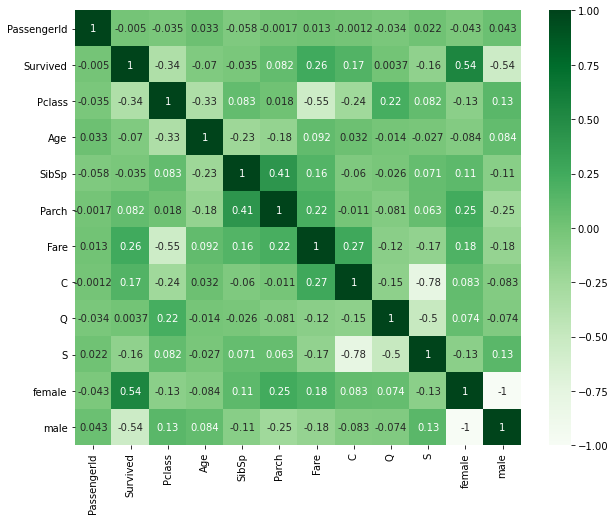

In [28]:
sns.heatmap(X_train.corr(), annot=True, cmap='Greens')
fig=plt.gcf()
fig.set_size_inches(10,8)

In [29]:
X_train.drop(columns=["PassengerId", "Name", "Age", "SibSp", "Parch", "Ticket", "Cabin"], inplace=True)

In [30]:
Y_train = X_train.Survived

In [31]:
X_train.drop(columns=["Survived"], inplace=True)
X_train.head()

,Pclass,Fare,C,Q,S,female,male
0,3,7.2500,0,0,1,0,1
1,1,71.2833,1,0,0,1,0
2,3,7.9250,0,0,1,1,0
3,1,53.1000,0,0,1,1,0
4,3,8.0500,0,0,1,0,1


In [32]:
X_test = db_test.copy()
X_test.drop(columns=["PassengerId", "Name", "Age", "SibSp", "Parch", "Ticket", "Cabin", "Sex"], inplace=True)
X_test.head()


,Pclass,Fare,C,Q,S,female,male
0,3,7.8292,0,1,0,0,1
1,3,7.0000,0,0,1,1,0
2,2,9.6875,0,1,0,0,1
3,3,8.6625,0,0,1,0,1
4,3,12.2875,0,0,1,1,0


In [33]:
X_test.isna().sum()

Pclass    0
Fare      1
C         0
Q         0
S         0
female    0
male      0
dtype: int64

In [34]:
fare_mean = X_test.Fare.mean()

X_test["Fare"].fillna(fare_mean, inplace=True)

In [35]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

features= ['Pclass', 'Fare', 'C', 'Q', 'S', 'female', 'male']
X_train[features]= scaler.fit_transform(X_train[features])
X_test[features]= scaler.fit_transform(X_test[features])

In [36]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()

In [37]:

train_X = X_train[:len(X_train)-89,:]
train_Y = Y_train[:len(X_train)-89]
val_X = X_train[len(X_train)-89:len(X_train),:]
val_Y = Y_train[len(X_train)-89:len(X_train)]

print("Train X Shape: ", train_X.shape)
print("Train Y Shape: ", train_Y.shape)
print("Val X Shape: ", val_X.shape)
print("Val Y Shape: ", val_Y.shape)

Train X Shape:  (802, 7)
Train Y Shape:  (802,)
Val X Shape:  (89, 7)
Val Y Shape:  (89,)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf =  RandomForestClassifier(n_estimators=120, criterion='entropy', min_samples_split=10, min_samples_leaf=2)

clf.fit(train_X, train_Y)

predict = clf.predict(val_X)

val_acc = accuracy_score(val_Y, predict)

print(val_acc)

0.797752808988764


In [39]:
predict_pd = pd.DataFrame(clf.predict(X_test))

In [40]:
submission = pd.concat([db_test.PassengerId, predict_pd.astype(int)], axis =1)
submission.columns=[['PassengerId', 'Survived']]

In [43]:
submission.to_csv("submission3.csv", index=False)